<a href="https://colab.research.google.com/github/Tieck-IT/Study/blob/main/Study/paper/glaucoma_dectetion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!mkdir /content/dataset 

In [4]:
!ls -al "/content/drive/MyDrive/Colab Notebooks/dataset/"

total 472385
-rw------- 1 root root 172964152 Dec 24 07:24 best_model.h5
-rw------- 1 root root  62685307 Dec 24 06:51 flower_prepared.zip
-rw------- 1 root root 124090252 Dec 29 07:49 galucoma.zip
-rw------- 1 root root 123981705 Dec 29 06:40 raw_galucoma.zip


In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/dataset/glaucoma.zip" -d /content/dataset

Archive:  /content/drive/MyDrive/Colab Notebooks/dataset/galucoma.zip
  inflating: /content/dataset/processed_data/data_description.txt  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/421.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/422.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/423.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/424.png  
  inflating: /content/dataset/processed_data/test/advanced_glaucoma/425.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/426.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/427.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/428.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/429.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/430.png  
 extracting: /content/dataset/processed_data/test/advanced_glaucoma/431.png  
  in

In [6]:
# tf.keras.applications.inception_v3.preprocess_input

In [7]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.layers import Input

input_tensor = Input(shape=(224, 224, 3))
model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=True)

96124928/96112376 [==============================] - 0s 0us/step


In [8]:
from tensorflow.keras.applications import InceptionV3

In [9]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
%matplotlib inline

BATCH_SIZE = 64
FILE_DIR = "/content/dataset/processed_data/"


preprocessor = preprocess_input

train_data_generator = ImageDataGenerator(
      rotation_range=10,
      width_shift_range=0.1,
      height_shift_range=0.1,
      horizontal_flip=True,
      vertical_flip=False,
      preprocessing_function=preprocessor,
    #   validation_split= 0.2,
).flow_from_directory(
      FILE_DIR+"train",
      target_size=(240,240),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
)

valid_data_generator = ImageDataGenerator(
 preprocessing_function=preprocessor
).flow_from_directory(
      FILE_DIR+ "valid",
      target_size=(240,240),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
     
)

test_data_generator = ImageDataGenerator(
    preprocessing_function=preprocessor

).flow_from_directory(
      FILE_DIR+ "test",
      target_size=(240,240),
      batch_size=BATCH_SIZE,
      class_mode='sparse'
      
)


Found 1230 images belonging to 3 classes.
Found 160 images belonging to 3 classes.
Found 154 images belonging to 3 classes.


In [10]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,BatchNormalization, Dropout,Conv2D, MaxPool2D, Activation, Input
from tensorflow import keras
from tensorflow.keras.initializers import GlorotNormal




initializer = GlorotNormal()
# from keras import backend as K

# 선행학습된 기준모델을 만듭니다
preprocessor = preprocess_input


conv_layers = InceptionV3(include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(240,240,3),
    pooling=None,
    classes=1000)
    #classifier_activation="softmax")

conv_layers.trainable = False

model = keras.Sequential()

# model.add(conv_layers)
# model.add(Input(input_shape = (240, 240, 3)))
model.add(Conv2D(16, (20, 20),activation='relu', kernel_initializer=initializer)) #,input_shape=(240, 240, 3)
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2),strides=2))
model.add(Conv2D(32, (40, 40),activation='relu', kernel_initializer=initializer)) # ,input_shape=(110, 110, 16)
model.add(Dropout(0.5))
model.add(MaxPool2D((2,2),strides=2))
model.add(Flatten())
model.add(Dense(32,activation='relu',kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(Dense(64,activation='relu',kernel_initializer=initializer))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="Adagrad", metrics=['acc'])


87924736/87910968 [==============================] - 0s 0us/step


In [11]:
history = model.fit(
      train_data_generator,
      validation_data=valid_data_generator,
      epochs=10
)

Epoch 1/10
20/20 [==============================] - 35s 995ms/step - loss: 1.0950 - acc: 0.4480 - val_loss: 1.0738 - val_acc: 0.5562
Epoch 2/10
20/20 [==============================] - 16s 804ms/step - loss: 1.0616 - acc: 0.4472 - val_loss: 1.0407 - val_acc: 0.5437
Epoch 3/10
20/20 [==============================] - 16s 808ms/step - loss: 1.0326 - acc: 0.5114 - val_loss: 0.9935 - val_acc: 0.5562
Epoch 4/10
20/20 [==============================] - 16s 809ms/step - loss: 1.0197 - acc: 0.5065 - val_loss: 1.0211 - val_acc: 0.5813
Epoch 5/10
20/20 [==============================] - 16s 809ms/step - loss: 0.9726 - acc: 0.5553 - val_loss: 1.0365 - val_acc: 0.6187
Epoch 6/10
20/20 [==============================] - 16s 810ms/step - loss: 0.9106 - acc: 0.5455 - val_loss: 1.0227 - val_acc: 0.6375
Epoch 7/10
20/20 [==============================] - 16s 815ms/step - loss: 0.9197 - acc: 0.5528 - val_loss: 0.9759 - val_acc: 0.6812
Epoch 8/10
20/20 [==============================] - 16s 814ms/step - 

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_188 (Conv2D)         (None, None, None, 16)    19216     
                                                                 
 dropout (Dropout)           (None, None, None, 16)    0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, None, None, 16)   0         
 2D)                                                             
                                                                 
 conv2d_189 (Conv2D)         (None, None, None, 32)    819232    
                                                                 
 dropout_1 (Dropout)         (None, None, None, 32)    0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, None, None, 32)   0         
 2D)                                                    

# 모델 성능 평가

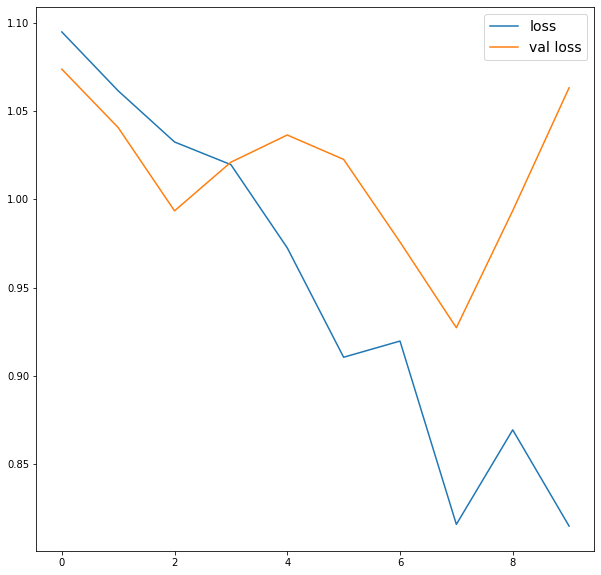

3/3 [==============================] - 1s 153ms/step - loss: 1.1035 - acc: 0.4026
loss= 1.1034971475601196
acc= 0.4025973975658417


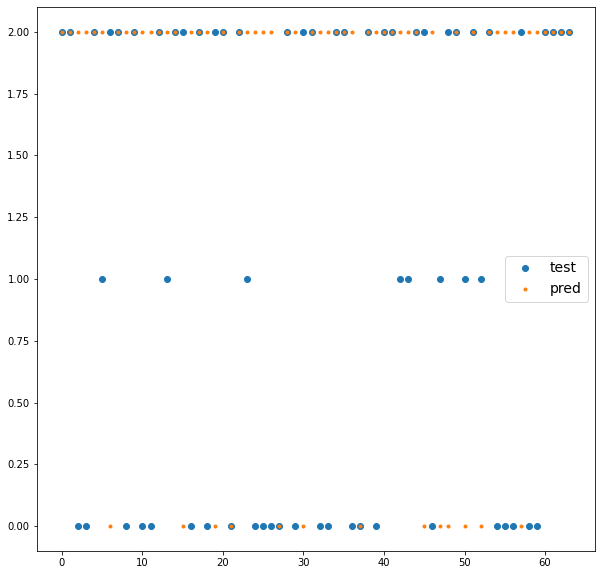

label category index = 2.0
predicted category index = 2
predicted category name = normal_control


In [26]:
fig = plt.figure(figsize = (10,10))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val loss")
plt.legend(loc='upper right', fontsize=14)
plt.show()


loss, acc = model.evaluate(test_data_generator)
print("loss=", loss)
print("acc=", acc)



batch_x, batch_y = test_data_generator.next()
y_ = model.predict(batch_x)
predicted = np.argmax(y_, axis=-1)

fig = plt.figure(figsize = (10,10))
plt.plot(batch_y[:100], "o", label="test")
plt.plot(predicted[:100], '.', label="pred")
plt.legend(loc='best', fontsize=14)
plt.show()


custom_labels = list(test_data_generator.class_indices.keys())
print("label category index =", batch_y[0])
print("predicted category index =", predicted[0])
print("predicted category name =", custom_labels[predicted[0]])

# 모델 시각화

In [16]:
!pip install graphviz
!pip install pydot

In [17]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
%matplotlib inline

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

ValueError: ignored

In [13]:
import os

import matplotlib.pyplot as plt
import numpy as np

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

from tensorflow.keras.applications import efficientnet
from tensorflow.keras.applications import EfficientNetB2

preprocessor = efficientnet.preprocess_input

# conv_layers = EfficientNetB2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# conv_layers.trainable = False

model = keras.Sequential()

# model.add(conv_layers)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(3, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer="RMSprop", metrics=['acc'])
model.summary()







ValueError: ignored